# Import Stuff

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.linalg import hankel

from embedding import create_embedding
from svd import find_eig
from projection import project_onto_signal_subspace
from threshold import find_threshold
from plot import plot_stuff

# Scenario DA1

In [2]:
X = np.asarray(pd.read_csv('../Dataset/TE/1-Scenario DA1/xmv10_359_data_1.csv', usecols=[14], header=None))

In [3]:
print(X)
print(X.shape)
print(max(X), min(X))

[[50.095]
 [48.633]
 [50.497]
 ...
 [64.971]
 [62.78 ]
 [63.63 ]]
(4801, 1)
[66.896] [40.675]


In [4]:
X_train = X[:2000]
X_test = X[1750:]

In [5]:
print(X_train.shape, X_test.shape)

(2000, 1) (3051, 1)


In [6]:
X_train_initial = X_train[:500]
X_train_theta = X_train[250:]

In [7]:
X_train_new, L = create_embedding(X_train_initial)

In [8]:
eigenValues, eigenVectors = find_eig(X_train_new)

### Plot after removing the 1st EigenValue

Text(0.5, 1.02, 'Scree Plot')

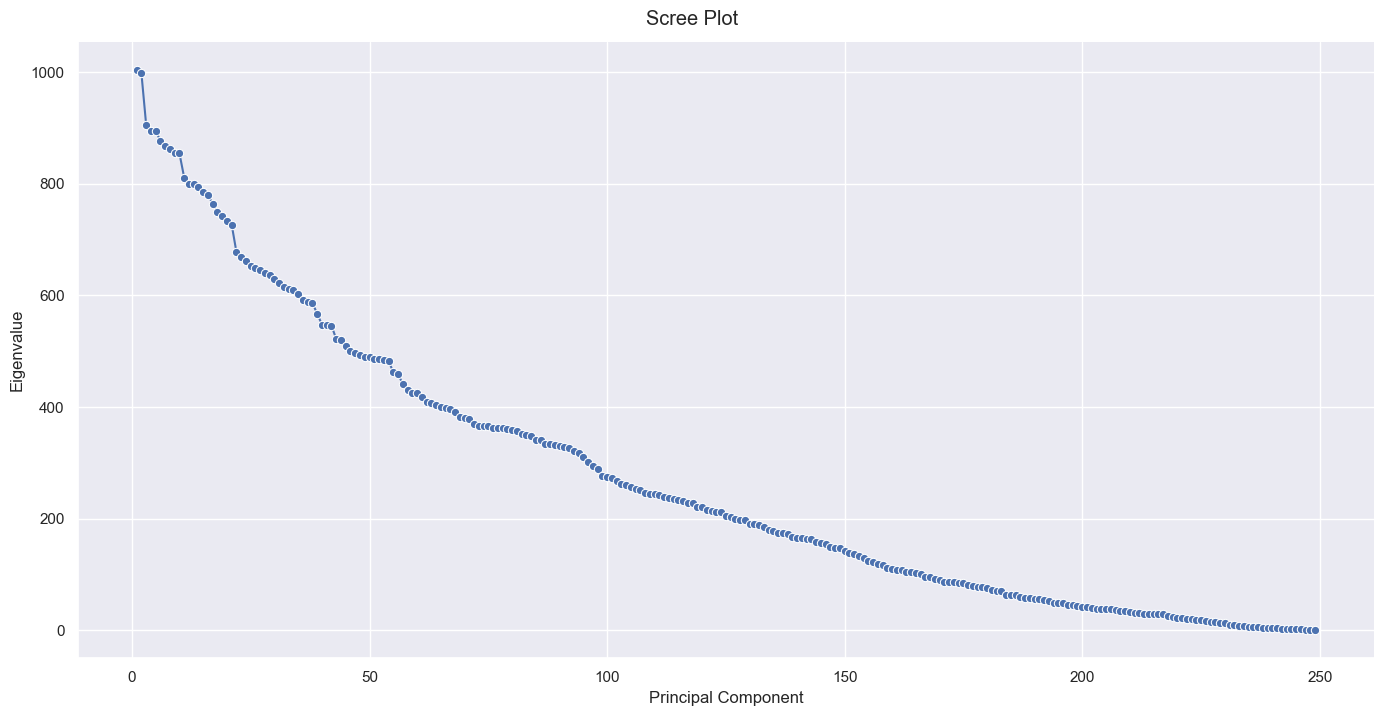

In [9]:
temp_df = pd.DataFrame({
    'Principal Component': range(1, len(eigenValues)),
    'Eigenvalue': eigenValues[1:]
})

sns.set_theme()

plot = sns.relplot(data=temp_df, x='Principal Component', y='Eigenvalue', kind='line', marker='o', height=7, aspect=2)

plot.set_axis_labels("Principal Component", "Eigenvalue")
plot.figure.suptitle("Scree Plot", y=1.02)

### Using our criteria of maximum consecutive difference

In [10]:
diff = np.diff(eigenValues[1:])

elbow_index = np.argmin(diff) + 1

print(f"The elbow is at component {elbow_index}")
print(f"The value of r: {elbow_index + 1}")

The elbow is at component 2
The value of r: 3


In [11]:
r = elbow_index + 1

In [12]:
centroid, pX, U, X_train_extracted_data = project_onto_signal_subspace(X_train_new, eigenVectors, r)

In [13]:
dtest_theta, dtrain_scores, dtest_scores = find_threshold(X_train_initial, X_train_theta, U, centroid, L)

In [14]:
print(dtest_theta)

4.501286770065579


In [15]:
Xj = hankel(X_test[:L], X_test[L-1:])
UT = U.T
pXj = np.matmul(UT, Xj)
dj_matrix = centroid - pXj
dj_scores = np.linalg.norm(dj_matrix, axis=0, ord=2)
dj_scores = np.asarray(dj_scores)
np.max(dj_scores)

np.float64(72.96927917875487)

(2, 2) (2, 2) (1, 1)


c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(xlables)
c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(xlables)


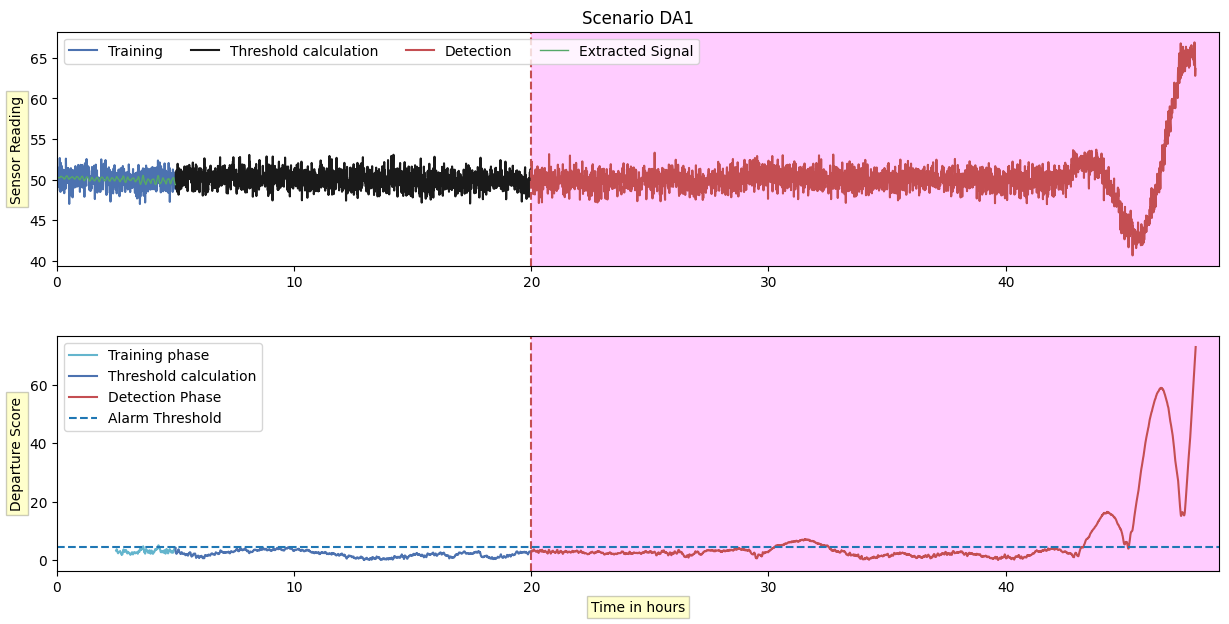

In [16]:
plot_stuff(1, X, X_train_extracted_data, dtrain_scores, dtest_scores, dj_scores, dtest_theta, L, "Scenario DA1")

# Scenario DA2

In [17]:
X = np.asarray(pd.read_csv('../Dataset/TE/2-Scenario DA2/xmeas7_zero_data_1.csv', usecols=[1], header=None))

In [18]:
print(X)
print(X.shape)
print(max(X), min(X))

[[3664.3]
 [3641.3]
 [3688.2]
 ...
 [3641.2]
 [3651.4]
 [3631.7]]
(4801, 1)
[3726.4] [3595.3]


### Plot after removing the 1st EigenValue

Text(0.5, 1.02, 'Scree Plot')

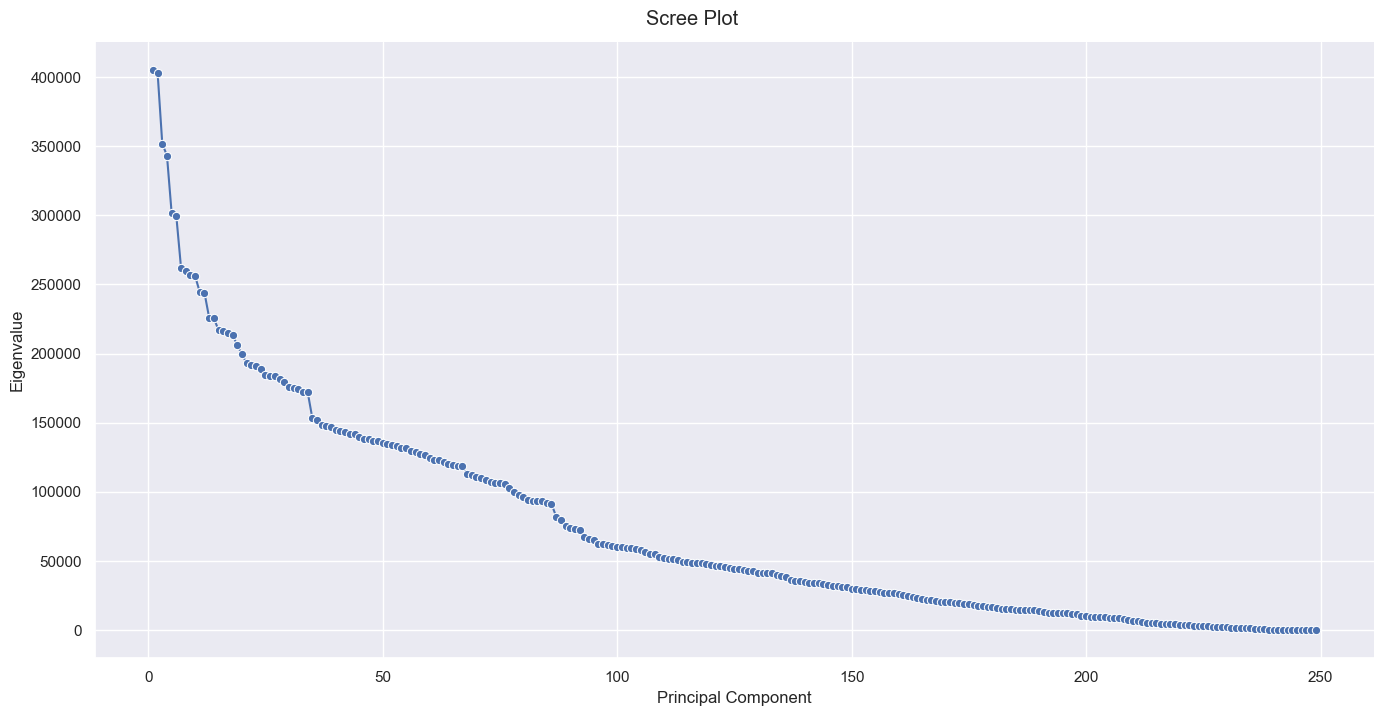

In [19]:
X_train = X[:2000]
X_test = X[1750:]

X_train_initial = X_train[:500]
X_train_theta = X_train[250:]

# Step 1
X_train_new, L = create_embedding(X_train_initial)

# Step 2
eigenValues, eigenVectors = find_eig(X_train_new)

# Scree Plot
temp_df = pd.DataFrame({
    'Principal Component': range(1, len(eigenValues)),
    'Eigenvalue': eigenValues[1:]
})

sns.set_theme()

plot = sns.relplot(data=temp_df, x='Principal Component', y='Eigenvalue', kind='line', marker='o', height=7, aspect=2)

plot.set_axis_labels("Principal Component", "Eigenvalue")
plot.figure.suptitle("Scree Plot", y=1.02)

### Using our criteria of maximum consecutive difference

In [20]:
diff = np.diff(eigenValues[1:])

elbow_index = np.argmin(diff) + 1

print(f"The elbow is at component {elbow_index}")
print(f"The value of r: {elbow_index + 1}")

The elbow is at component 2
The value of r: 3


66.27082703847157
(2, 2) (2, 2) (1, 1)


c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(xlables)
c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(xlables)


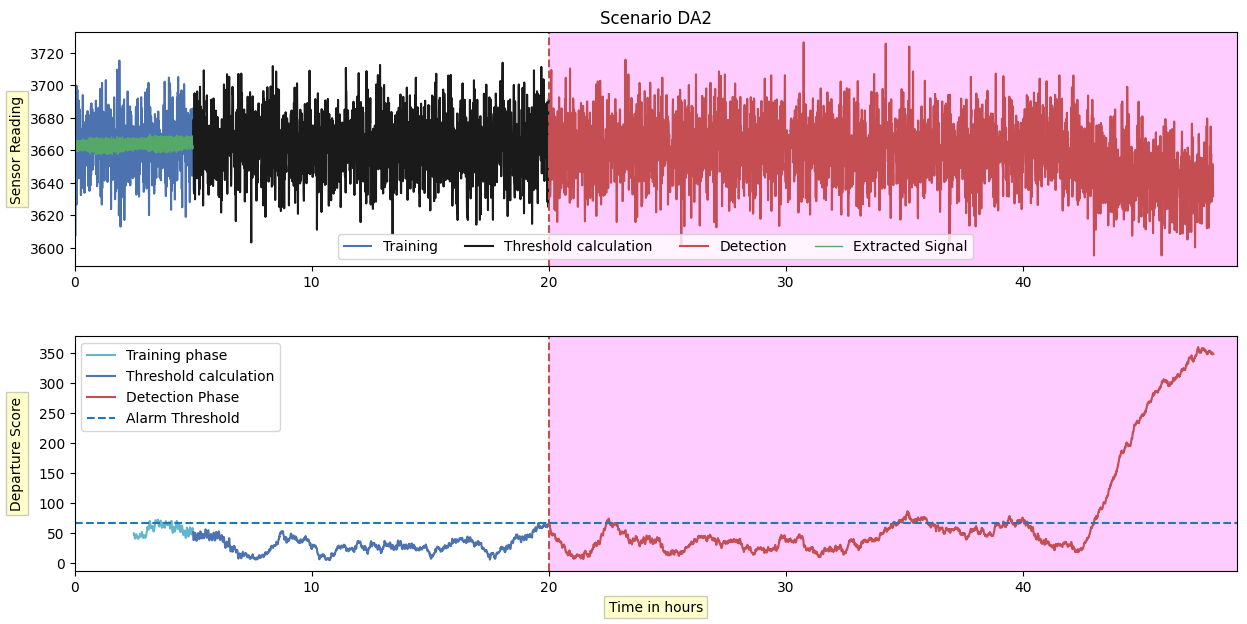

In [21]:
r = elbow_index + 1

# Step 3
centroid, pX, U, X_train_extracted_data = project_onto_signal_subspace(X_train_new, eigenVectors, r)

# Step 4
dtest_theta, dtrain_scores, dtest_scores = find_threshold(X_train_initial, X_train_theta, U, centroid, L)

print(dtest_theta)

Xj = hankel(X_test[:L], X_test[L-1:])
UT = U.T
pXj = np.matmul(UT, Xj)
dj_matrix = centroid - pXj
dj_scores = np.linalg.norm(dj_matrix, axis=0, ord=2)
dj_scores = np.asarray(dj_scores)
np.max(dj_scores)

plot_stuff(1, X, X_train_extracted_data, dtrain_scores, dtest_scores, dj_scores, dtest_theta, L, "Scenario DA2")

# Scenario SA1

In [22]:
X = np.asarray(pd.read_csv('../Dataset/TE/3-Scenario SA1/xmv9_hundred_data_1.csv', usecols=[1], header=None))

In [ ]:
print(X)
print(X.shape)
print(max(X), min(X))

[[3664.3]
 [3667.7]
 [3688.9]
 ...
 [3579.9]
 [3576.4]
 [3597.2]]
(4801, 1)
[3729.4] [3550.]


### Plot after removing the 1st EigenValue

Text(0.5, 1.02, 'Scree Plot')

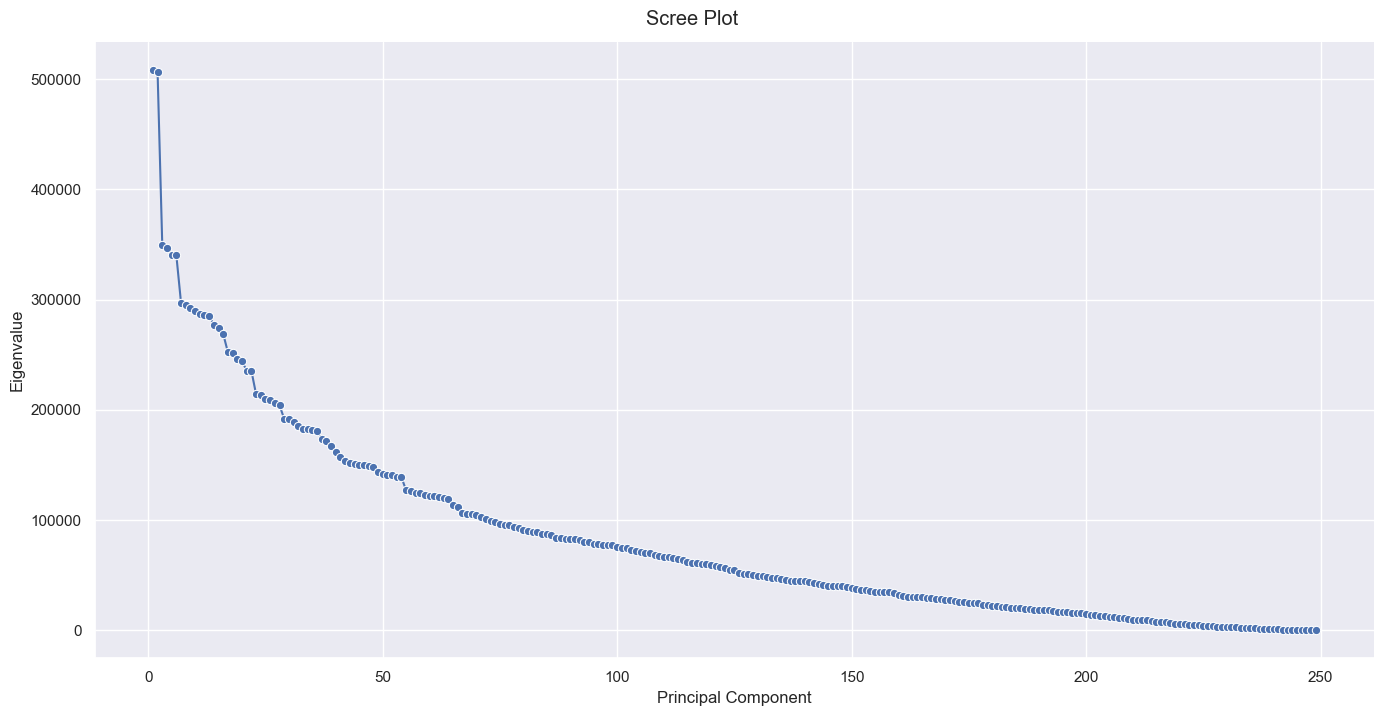

In [24]:
X_train = X[:2000]
X_test = X[1750:]

X_train_initial = X_train[:500]
X_train_theta = X_train[250:]

# Step 1
X_train_new, L = create_embedding(X_train_initial)

# Step 2
eigenValues, eigenVectors = find_eig(X_train_new)

# Scree Plot
temp_df = pd.DataFrame({
    'Principal Component': range(1, len(eigenValues)),
    'Eigenvalue': eigenValues[1:]
})

sns.set_theme()

plot = sns.relplot(data=temp_df, x='Principal Component', y='Eigenvalue', kind='line', marker='o', height=7, aspect=2)

plot.set_axis_labels("Principal Component", "Eigenvalue")
plot.figure.suptitle("Scree Plot", y=1.02)

### Using our criteria of maximum consecutive difference

In [25]:
diff = np.diff(eigenValues[1:])

elbow_index = np.argmin(diff) + 1

print(f"The elbow is at component {elbow_index}")
print(f"The value of r: {elbow_index + 1}")

The elbow is at component 2
The value of r: 3


77.90911847824208
(2, 2) (2, 2) (1, 1)


c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(xlables)
c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(xlables)


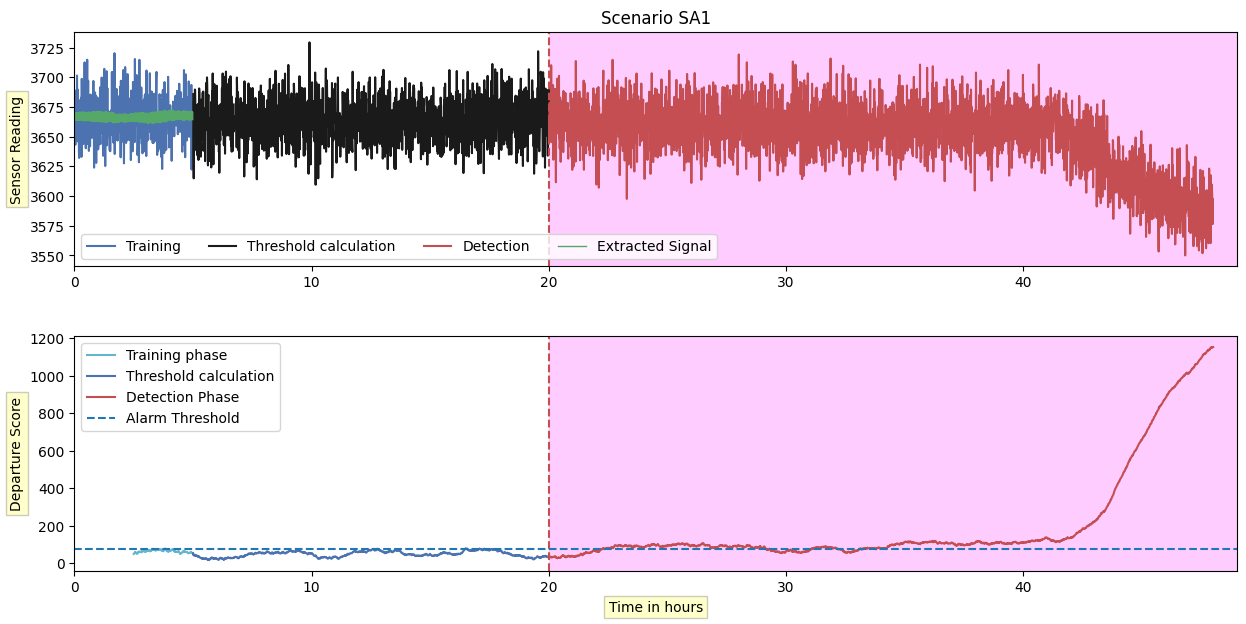

In [26]:
r = elbow_index + 1

# Step 3
centroid, pX, U, X_train_extracted_data = project_onto_signal_subspace(X_train_new, eigenVectors, r)

# Step 4
dtest_theta, dtrain_scores, dtest_scores = find_threshold(X_train_initial, X_train_theta, U, centroid, L)

print(dtest_theta)

Xj = hankel(X_test[:L], X_test[L-1:])
UT = U.T
pXj = np.matmul(UT, Xj)
dj_matrix = centroid - pXj
dj_scores = np.linalg.norm(dj_matrix, axis=0, ord=2)
dj_scores = np.asarray(dj_scores)
np.max(dj_scores)

plot_stuff(1, X, X_train_extracted_data, dtrain_scores, dtest_scores, dj_scores, dtest_theta, L, "Scenario SA1")

# Scenario SA2

In [27]:
X = np.asarray(pd.read_csv('../Dataset/TE/4-Scenario SA2/xmv6_twentyeight_data_1.csv', usecols=[6], header=None))

In [28]:
print(X)
print(f"Shape of X: {X.shape}")
print(f"Maximum value: {max(X)}, Minimum value: {min(X)}")

[[2799.1]
 [2799.6]
 [2799.8]
 ...
 [2783.2]
 [2784.7]
 [2784.1]]
Shape of X: (4801, 1)
Maximum value: [2804.3], Minimum value: [2783.2]


### Plot after removing the 1st EigenValue

Text(0.5, 1.02, 'Scree Plot')

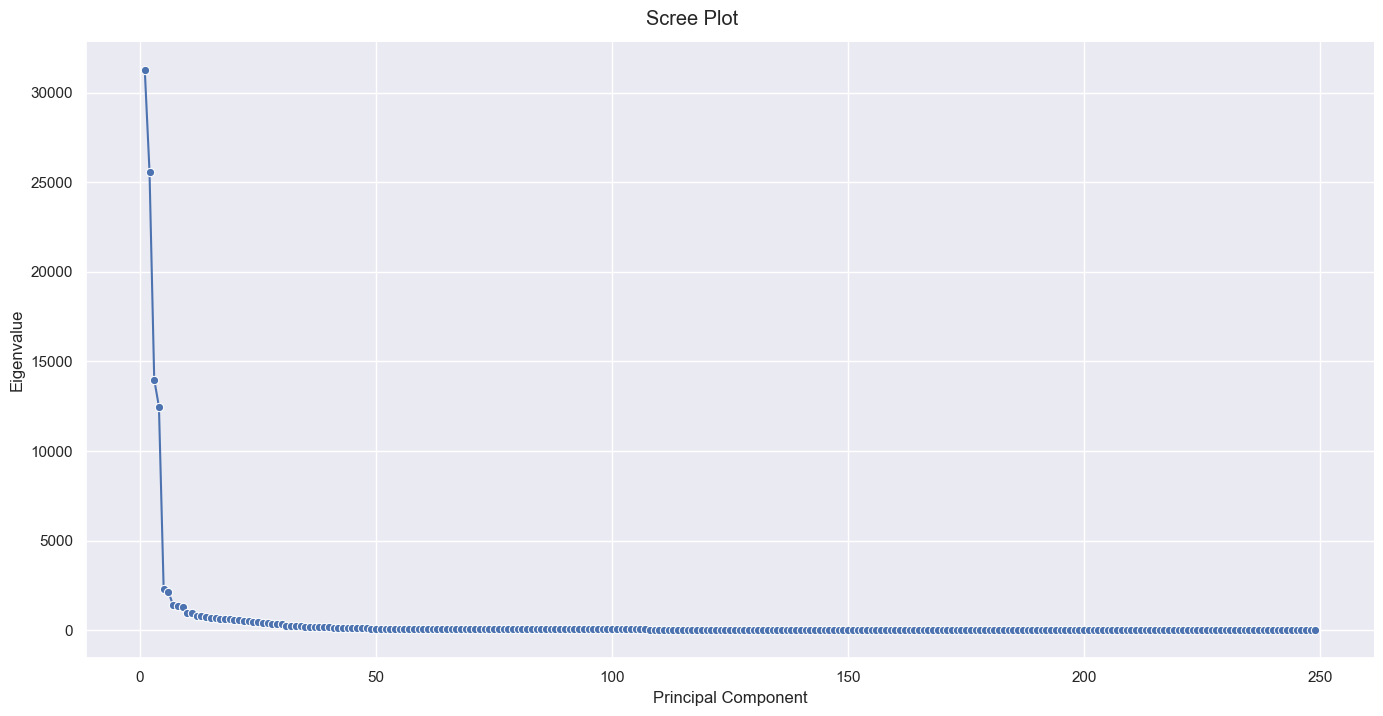

In [29]:
X_train = X[:2000]
X_test = X[1750:]

X_train_initial = X_train[:500]
X_train_theta = X_train[250:]

# Step 1
X_train_new, L = create_embedding(X_train_initial)

# Step 2
eigenValues, eigenVectors = find_eig(X_train_new)

# Scree Plot
temp_df = pd.DataFrame({
    'Principal Component': range(1, len(eigenValues)),
    'Eigenvalue': eigenValues[1:]
})

sns.set_theme()

plot = sns.relplot(data=temp_df, x='Principal Component', y='Eigenvalue', kind='line', marker='o', height=7, aspect=2)

plot.set_axis_labels("Principal Component", "Eigenvalue")
plot.figure.suptitle("Scree Plot", y=1.02)

### Using our criteria of maximum consecutive difference

In [30]:
diff = np.diff(eigenValues[1:])

elbow_index = np.argmin(diff) + 1

print(f"The elbow is at component {elbow_index}")
print(f"The value of r: {elbow_index + 1}")

The elbow is at component 2
The value of r: 3


16.29717596055248
(2, 2) (2, 2) (1, 1)


c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(xlables)
c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(xlables)


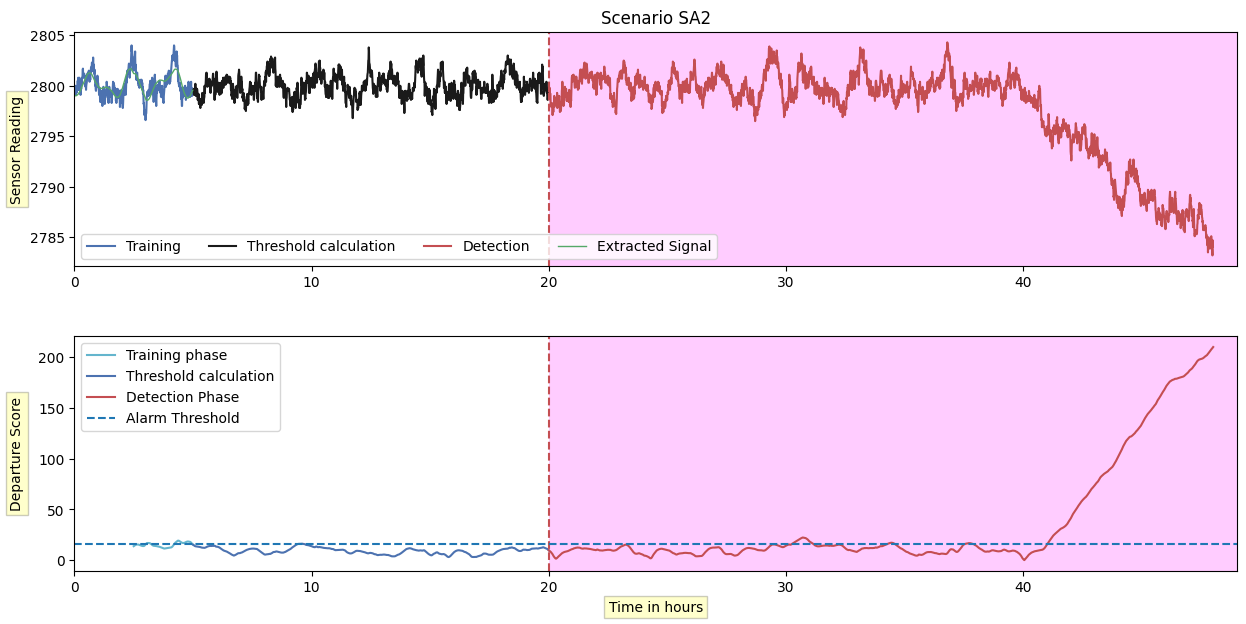

In [31]:
r = elbow_index + 1

# Step 3
centroid, pX, U, X_train_extracted_data = project_onto_signal_subspace(X_train_new, eigenVectors, r)

# Step 4
dtest_theta, dtrain_scores, dtest_scores = find_threshold(X_train_initial, X_train_theta, U, centroid, L)

print(dtest_theta)

Xj = hankel(X_test[:L], X_test[L-1:])
UT = U.T
pXj = np.matmul(UT, Xj)
dj_matrix = centroid - pXj
dj_scores = np.linalg.norm(dj_matrix, axis=0, ord=2)
dj_scores = np.asarray(dj_scores)
np.max(dj_scores)

plot_stuff(1, X, X_train_extracted_data, dtrain_scores, dtest_scores, dj_scores, dtest_theta, L, "Scenario SA2")

# Scenario SA3

In [32]:
X = np.asarray(pd.read_csv('../Dataset/TE/5-Scenario SA3/xmeas10_001_data_1.csv', usecols=[9], header=None))

In [33]:
print(X)
print(f"Shape of X: {X.shape}")
print(f"Maximum value: {max(X)}, Minimum value: {min(X)}")

[[0.19833]
 [0.19818]
 [0.19796]
 ...
 [0.15563]
 [0.15788]
 [0.15627]]
Shape of X: (4801, 1)
Maximum value: [0.44692], Minimum value: [0.15506]


### Plot after removing the 1st EigenValue

Text(0.5, 1.02, 'Scree Plot')

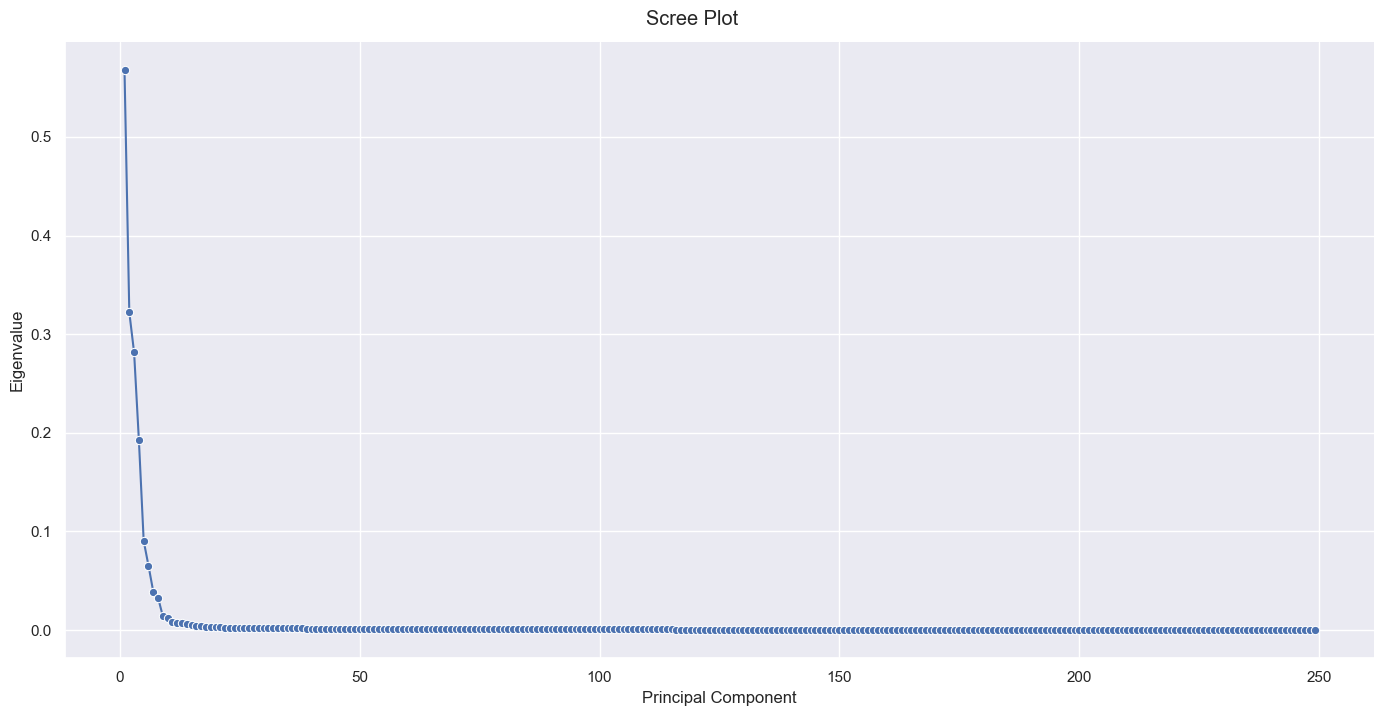

In [34]:
X_train = X[:2000]
X_test = X[1750:]

X_train_initial = X_train[:500]
X_train_theta = X_train[250:]

# Step 1
X_train_new, L = create_embedding(X_train_initial)

# Step 2
eigenValues, eigenVectors = find_eig(X_train_new)

# Scree Plot
temp_df = pd.DataFrame({
    'Principal Component': range(1, len(eigenValues)),
    'Eigenvalue': eigenValues[1:]
})

sns.set_theme()

plot = sns.relplot(data=temp_df, x='Principal Component', y='Eigenvalue', kind='line', marker='o', height=7, aspect=2)

plot.set_axis_labels("Principal Component", "Eigenvalue")
plot.figure.suptitle("Scree Plot", y=1.02)

### Using our criteria of maximum consecutive difference

In [35]:
diff = np.diff(eigenValues[1:])

elbow_index = np.argmin(diff) + 1

print(f"The elbow is at component {elbow_index}")
print(f"The value of r: {elbow_index + 1}")

The elbow is at component 1
The value of r: 2


0.2223985598889183
(2, 2) (2, 2) (1, 1)


c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(xlables)
c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(xlables)


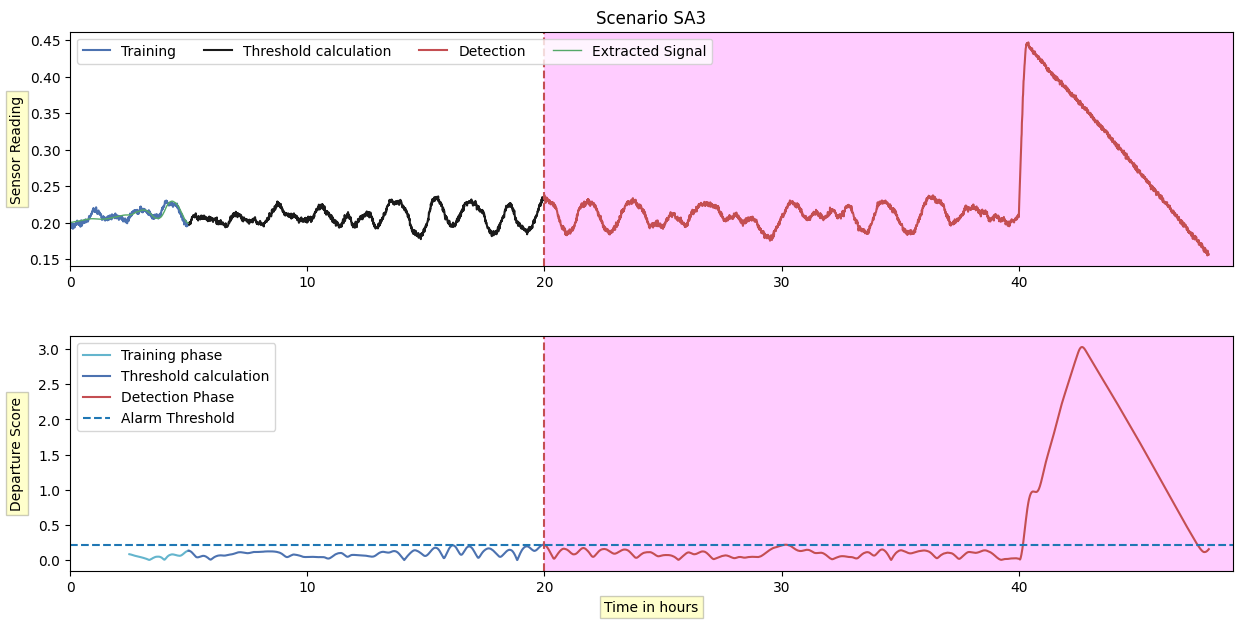

In [36]:
r = elbow_index + 1

# Step 3
centroid, pX, U, X_train_extracted_data = project_onto_signal_subspace(X_train_new, eigenVectors, r)

# Step 4
dtest_theta, dtrain_scores, dtest_scores = find_threshold(X_train_initial, X_train_theta, U, centroid, L)

print(dtest_theta)

Xj = hankel(X_test[:L], X_test[L-1:])
UT = U.T
pXj = np.matmul(UT, Xj)
dj_matrix = centroid - pXj
dj_scores = np.linalg.norm(dj_matrix, axis=0, ord=2)
dj_scores = np.asarray(dj_scores)
np.max(dj_scores)

plot_stuff(1, X, X_train_extracted_data, dtrain_scores, dtest_scores, dj_scores, dtest_theta, L, "Scenario SA3")

# SWaT Dataset

In [37]:
X_train = pd.read_excel('../Dataset/SWaT/SWaT_Dataset_Normal_v0.xlsx', usecols=[19], header=None)
X_test = pd.read_excel('../Dataset/SWaT/SWaT_Dataset_Attack_v0.xlsx', usecols=[19], header=None)

In [38]:
X_train = X_train.drop(index=0).reset_index(drop=True)
X_test = X_test.drop(index=0).reset_index(drop=True)

In [39]:
X_train = np.asarray(X_train, dtype=np.float32)
X_test = np.asarray(X_test, dtype=np.float32)

In [40]:
print(X_train.shape, X_test.shape)

(496800, 1) (449919, 1)


In [41]:
X_train_copy = X_train[-200000:]

### Plot after removing the 1st EigenValue

Text(0.5, 1.02, 'Scree Plot')

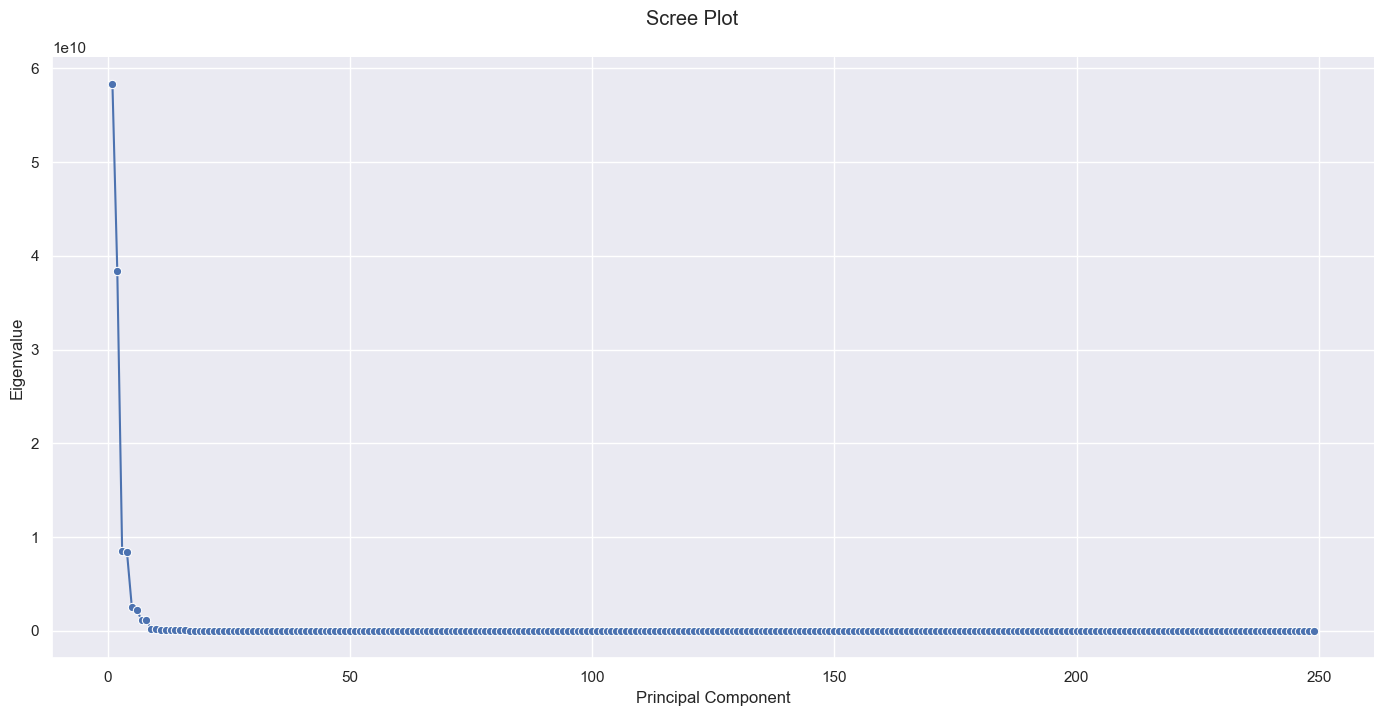

In [42]:
X_train_initial = X_train_copy[:10000]
X_train_theta = X_train_copy[7500:]

# Step 1
X_train_new, L = create_embedding(X_train_initial)

# Step 2
eigenValues, eigenVectors = find_eig(X_train_new)

# Scree Plot
temp_df = pd.DataFrame({
    'Principal Component': range(1, 250),
    'Eigenvalue': eigenValues[1:250] # Value of r will not be very big so there is no point in plotting the trailing values
})

sns.set_theme()

plot = sns.relplot(data=temp_df, x='Principal Component', y='Eigenvalue', kind='line', marker='o', height=7, aspect=2)

plot.set_axis_labels("Principal Component", "Eigenvalue")
plot.figure.suptitle("Scree Plot", y=1.02)

In [43]:
X = np.concatenate((X_train_copy, X_test))

print(X)
print(f"Shape of X: {X.shape}")

[[939.9433]
 [940.1035]
 [939.9833]
 ...
 [974.2695]
 [974.2294]
 [974.4296]]
Shape of X: (649919, 1)


### Using our criteria of maximum consecutive difference

In [44]:
diff = np.diff(eigenValues[1:500])

elbow_index = np.argmin(diff) + 1

print(f"The elbow is at component {elbow_index}")
print(f"The value of r: {elbow_index + 1}")

The elbow is at component 2
The value of r: 3


5481.096492451534


c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:84: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(xlables)
c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:107: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(xlables)


(2, 2) (2, 2) (1, 1)


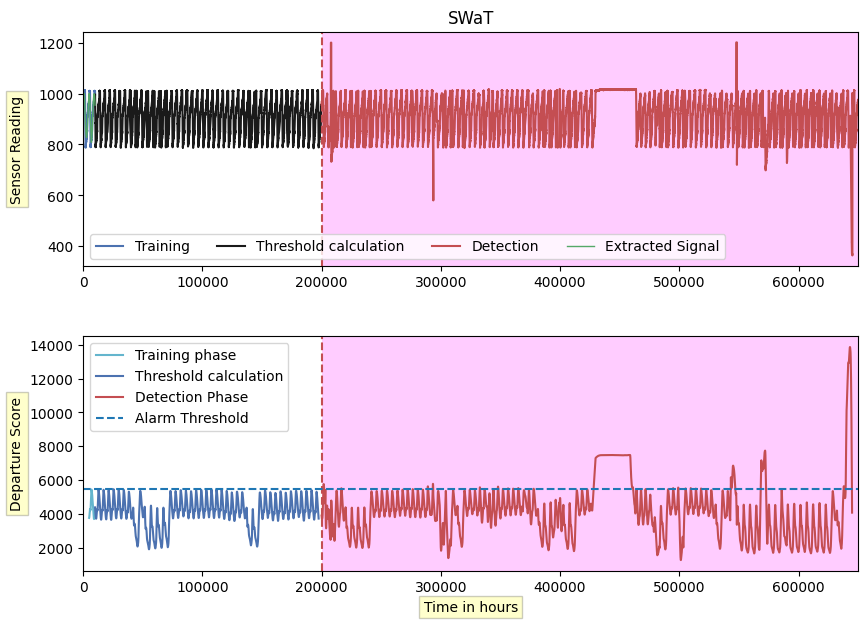

In [45]:
r = elbow_index + 1

# Step 3
centroid, pX, U, X_train_extracted_data = project_onto_signal_subspace(X_train_new, eigenVectors, r)

# Step 4
dtest_theta, dtrain_scores, dtest_scores = find_threshold(X_train_initial, X_train_theta, U, centroid, L)

print(dtest_theta)

Xj = hankel(X_test[:L], X_test[L-1:])
UT = U.T
pXj = np.matmul(UT, Xj)
dj_matrix = centroid - pXj
dj_scores = np.linalg.norm(dj_matrix, axis=0, ord=2)
dj_scores = np.asarray(dj_scores)
np.max(dj_scores)

plot_stuff(2, X, X_train_extracted_data, dtrain_scores, dtest_scores, dj_scores, dtest_theta, L, "SWaT")